# Exciton Analysis and Visualization 
**by <span style="color:darkgreen">Dmitrii Nabok</span>, <span style="color:darkgreen">Christian Vorwerk</span>, <span style="color:darkgreen">Keith Gilmore</span>, <span style="color:darkgreen">Olga Turkina</span>, & <span style="color:darkgreen">Caterina Cocchi</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span> and <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, we show how to use advanced visualization tools to analyze excitons, as computed from the solution of the **BSE**. With the example of lithium fluoride, you will learn how to visualize an exciton wavefunction in real-space and how to identify the main contributions to the excitation from the band structure of the material.

<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">
    
**Table of Contents**

[0. Before Starting](#0)
    
[1. Theoretical background: The electron-hole wavefunction](#1)
    
[2. Absorption spectrum of LiF](#2)
    
  - [Preparation of the input file](#2)
  - [Running the calculation](#3)
    
[3. Visualization of the exciton wavefunction](#4)
    
  - [Preparation of the input file](#4)
  - [Running calculations](#5)
  - [Real-space visualization and analysis of the exciton wavefunction](#6)
  - [Reciprocal-space visualization and analysis of the exciton wavefunction](#7)
  - [Exercises](#8)
  - [Visualization of core excitations](#8)

[Literature](#9)
    

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

Furthermore, this tutorial requires the usage of the following visualization packages:

- **<span style="color:green">XCrySDen</span>**: Crystal visualization package.
- **<span style="color:green">VESTA</span>**: **[Crystal visualization package](http://jp-minerals.org/vesta/en/)**.


<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Theoretical background: The electron-hole wavefunction</span>

<hr style="border:1px solid #DDD"> </hr>

<details>
<summary><strong><span style="color:firebrick">$\Rightarrow$ The electron-hole wavefunction</span></strong>
 
<hr style="border:1px solid #DDD"> </hr>    
    
</summary>  
The two-particle electron-hole wavefunction is calculated from the solution of the eigenvalue problem for the Bethe-Salpeter effective Hamiltonian $H ^{\rm (eff)}$,

$$\begin{align} H ^{\rm (eff)}\: | A_{\lambda} \rangle= E_{\lambda}\: |A_{\lambda}\rangle\:, \end{align}$$

which is introduced and extensively discussed in the tutorial **Excited states from BSE**.

Here, we focus specifically on the eigenvectors resulting from the diagonalization, namely $| A_\lambda\rangle = \sum_{v\,c\,\mathbf{k}} A^{\lambda}_{v\,c\,\mathbf{k}} |v\,c\,\mathbf{k}\rangle$ , where the coefficients $A^{\lambda}_{v\,c\,\mathbf{k}} = \langle v\,c\,\mathbf{k}|A^{\lambda}\rangle$ enter the expression of the two-particle electron-hole wavefunction

$$\begin{align} \Psi_{\lambda}\!(\mathbf{r}_h, \mathbf{r}_e) = \sum_{vc\mathbf{k}}\:A^{\lambda}_{vc\mathbf{k}} \: \psi_{v\mathbf{k}}\!(\mathbf{r}_h) \: \psi^*_{c\mathbf{k}}\!(\mathbf{r}_e), \end{align}$$

as weighting factor for the transitions between the quasi-particle wavefuctions $\psi_{v\mathbf{k}}\!(\mathbf{r}_h)$ and $\psi_{v\mathbf{k}}\!(\mathbf{r}_e)$. It should be noticed that $\Psi_{\lambda}\!(\mathbf{r}_h, \mathbf{r}_e)$ depends explicitly on the electron and the hole coordinates. As we will show in the following, the two-particle wavefunction can be visualized in real space by fixing either the electron or the hole coordinate.

Another way to analyze the character of the exciton is to adopt a reciprocal-space representation. To do so, it is convenient to introduce the **excitonic weights** of valence and conduction bands, which are defined respectively as

$$\begin{align} w^{\lambda}_{v\mathbf{k}} = \sum_c|A^{\lambda}_{vc\mathbf{k}}|^2 \end{align}$$

and

$$\begin{align} w^{\lambda}_{c\mathbf{k}} = \sum_v|A^{\lambda}_{vc\mathbf{k}}|^2 . \end{align}$$

In these expressions we recognize again the **BSE** coefficients $A^{\lambda}_{v\,c\,\mathbf{k}}$.

</details>

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Absorption spectrum of LiF</span>

You should have already calculated the absorption spectrum of LiF in the tutorial **Excited states from BSE**. Here, we repeat this calculation and analyse the character of the electron-hole wavefunction that corresponds to the first and the most intense excitonic peak.

#### <span style="color:#15317E">i) Preparation of the input file</span>

As a first step, create a directory named **run_LiF_exciton**.

In [2]:
%%bash 
mkdir -p run_LiF_exciton

Below is an example input file for the LiF ground-state calculation, as well as for the calculations of the optical absorption spectrum of LiF. Notice that within the <code><span style="color:green">groundstate</span></code> block the <code><span style="color:green">properties</span></code> element is present in order to calculate the band structure of the system (for details, see the tutorial **Electronic band-structure and density of states**).

<span class="LiF_BSE_VISUAL"></span>
```xml
<input>
 
   <title>LiF-BSE-visual</title>
 
   <structure speciespath="$EXCITINGROOT/species/">
      <crystal scale="7.608">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>
      <species speciesfile="F.xml">
         <atom coord="0.5000  0.5000  0.5000" />
      </species>
      <species speciesfile="Li.xml">
         <atom coord="0.0000  0.0000  0.0000" />
      </species>
   </structure>
 
   <groundstate
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      gmaxvr="14.0"/>
 
   <properties>
 
      <bandstructure>
         <plot1d>
            <path steps="100">
               <point coord="0.750   0.500   0.250" label="W"    />
               <point coord="0.500   0.500   0.500" label="L"    />
               <point coord="0.000   0.000   0.000" label="GAMMA"/>
               <point coord="0.500   0.500   0.000" label="X"    />
               <point coord="0.750   0.500   0.250" label="W"    />
               <point coord="0.750   0.375   0.375" label="K"    />
            </path>
         </plot1d>
      </bandstructure>
 
   </properties>
 
   <xs 
      xstype="BSE" 
      ngridk="3 3 3" 
      vkloff="0.097 0.273 0.493"
      ngridq="3 3 3"
      nempty="30"
      gqmax="2.5"
      broad="0.007"
      scissor="0.20947"
      tappinfo="true"
      tevout="true">
 
      <energywindow 
         intv="0.0 1.0" 
         points="1200"/>
 
      <screening 
         screentype="full"
         nempty="60"/>
 
      <BSE 
         bsetype="singlet"
         nstlbse="1 5 1 4"/>
 
      <qpointset>
         <qpoint>0.0 0.0 0.0</qpoint>
      </qpointset>
 
      <storeexcitons 
         selectenergy="false"
         MinNumberExcitons="1" 
         MaxNumberExcitons="5"
         MinEnergyExcitons="0" 
         MaxEnergyExcitons="13.8"/>
 
   </xs>
 
</input>

```

The first part of the input file above is the same as used in **Excited states from BSE**. In addition, the new element <code><span style="color:green">storeexcitons</span></code> appears, to enable storing the **BSE** coefficients. The range for storing the excitons can be defined either as an exciton index or an energy range. When choosing the index range, we need to set the attribute <code><span style="color:mediumblue">selectenergy</span>=<span style="color:firebrick">"false"</span></code>. In that case, the attributes <code><span style="color:mediumblue">MinNumberExcitons</span></code> and <code><span style="color:mediumblue">MaxNumberExcitons</span></code> indicate the index of the first and last **BSE** solution to be stored, respectively. When choosing the energy range we select <code><span style="color:mediumblue">selectenergy</span>=<span style="color:firebrick">"true"</span></code> and set the attributes <code><span style="color:mediumblue">MinEnergyExcitons</span></code> and <code><span style="color:mediumblue">MaxEnergyExcitons</span></code> to the lower and upper energy limit, respectively. The default energy is given in eV. In this example we consider the first 5 solutions of the **BSE**.

<a id='3'></a>
#### <span style="color:#15317E">ii) Running the calculation</span>

To run the calculation, save the text of the example above into the file **input.xml** inside the working directory **run_LiF_exciton**.

In [3]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("02_tutorial_exciton_analysis_and_visualization", "LiF_BSE_VISUAL")

# Write out the input as an XML file:
with open('./run_LiF_exciton/input.xml', "w") as fid:
    fid.write(input_str)

Before starting the calculation, make sure to set the <code><span style="color:mediumblue">speciespath</span></code>:

In [4]:
%%bash
cd run_LiF_exciton
python3 -m excitingscripts.setup.excitingroot
cd ..

Then run the calculation:

In [5]:
%%bash
cd run_LiF_exciton
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(bandstr):
 band structure plot written to BAND.OUT
 
 Fermi energy is at zero in plot
 
 Vertex location lines written to BANDLINES.OUT
 


   Elapsed time = 1m47s


The calculation may take a few minutes. When it finishes, we can plot the absorption spectrum just as in the previous tutorial.

In [7]:
%%bash
cd run_LiF_exciton
cp EPSILON/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT singlet-TDA
python3 -m excitingscripts.plot.files -f singlet-TDA  -lx 'Energy [eV]'  -ly 'Im $\varepsilon_M$'  -t 'Macroscopic dielectric function'  -g  -rc  -cy 3  -x 0 27  -nl
cd ..

The result should look like the following.

<figure>
<img src=" 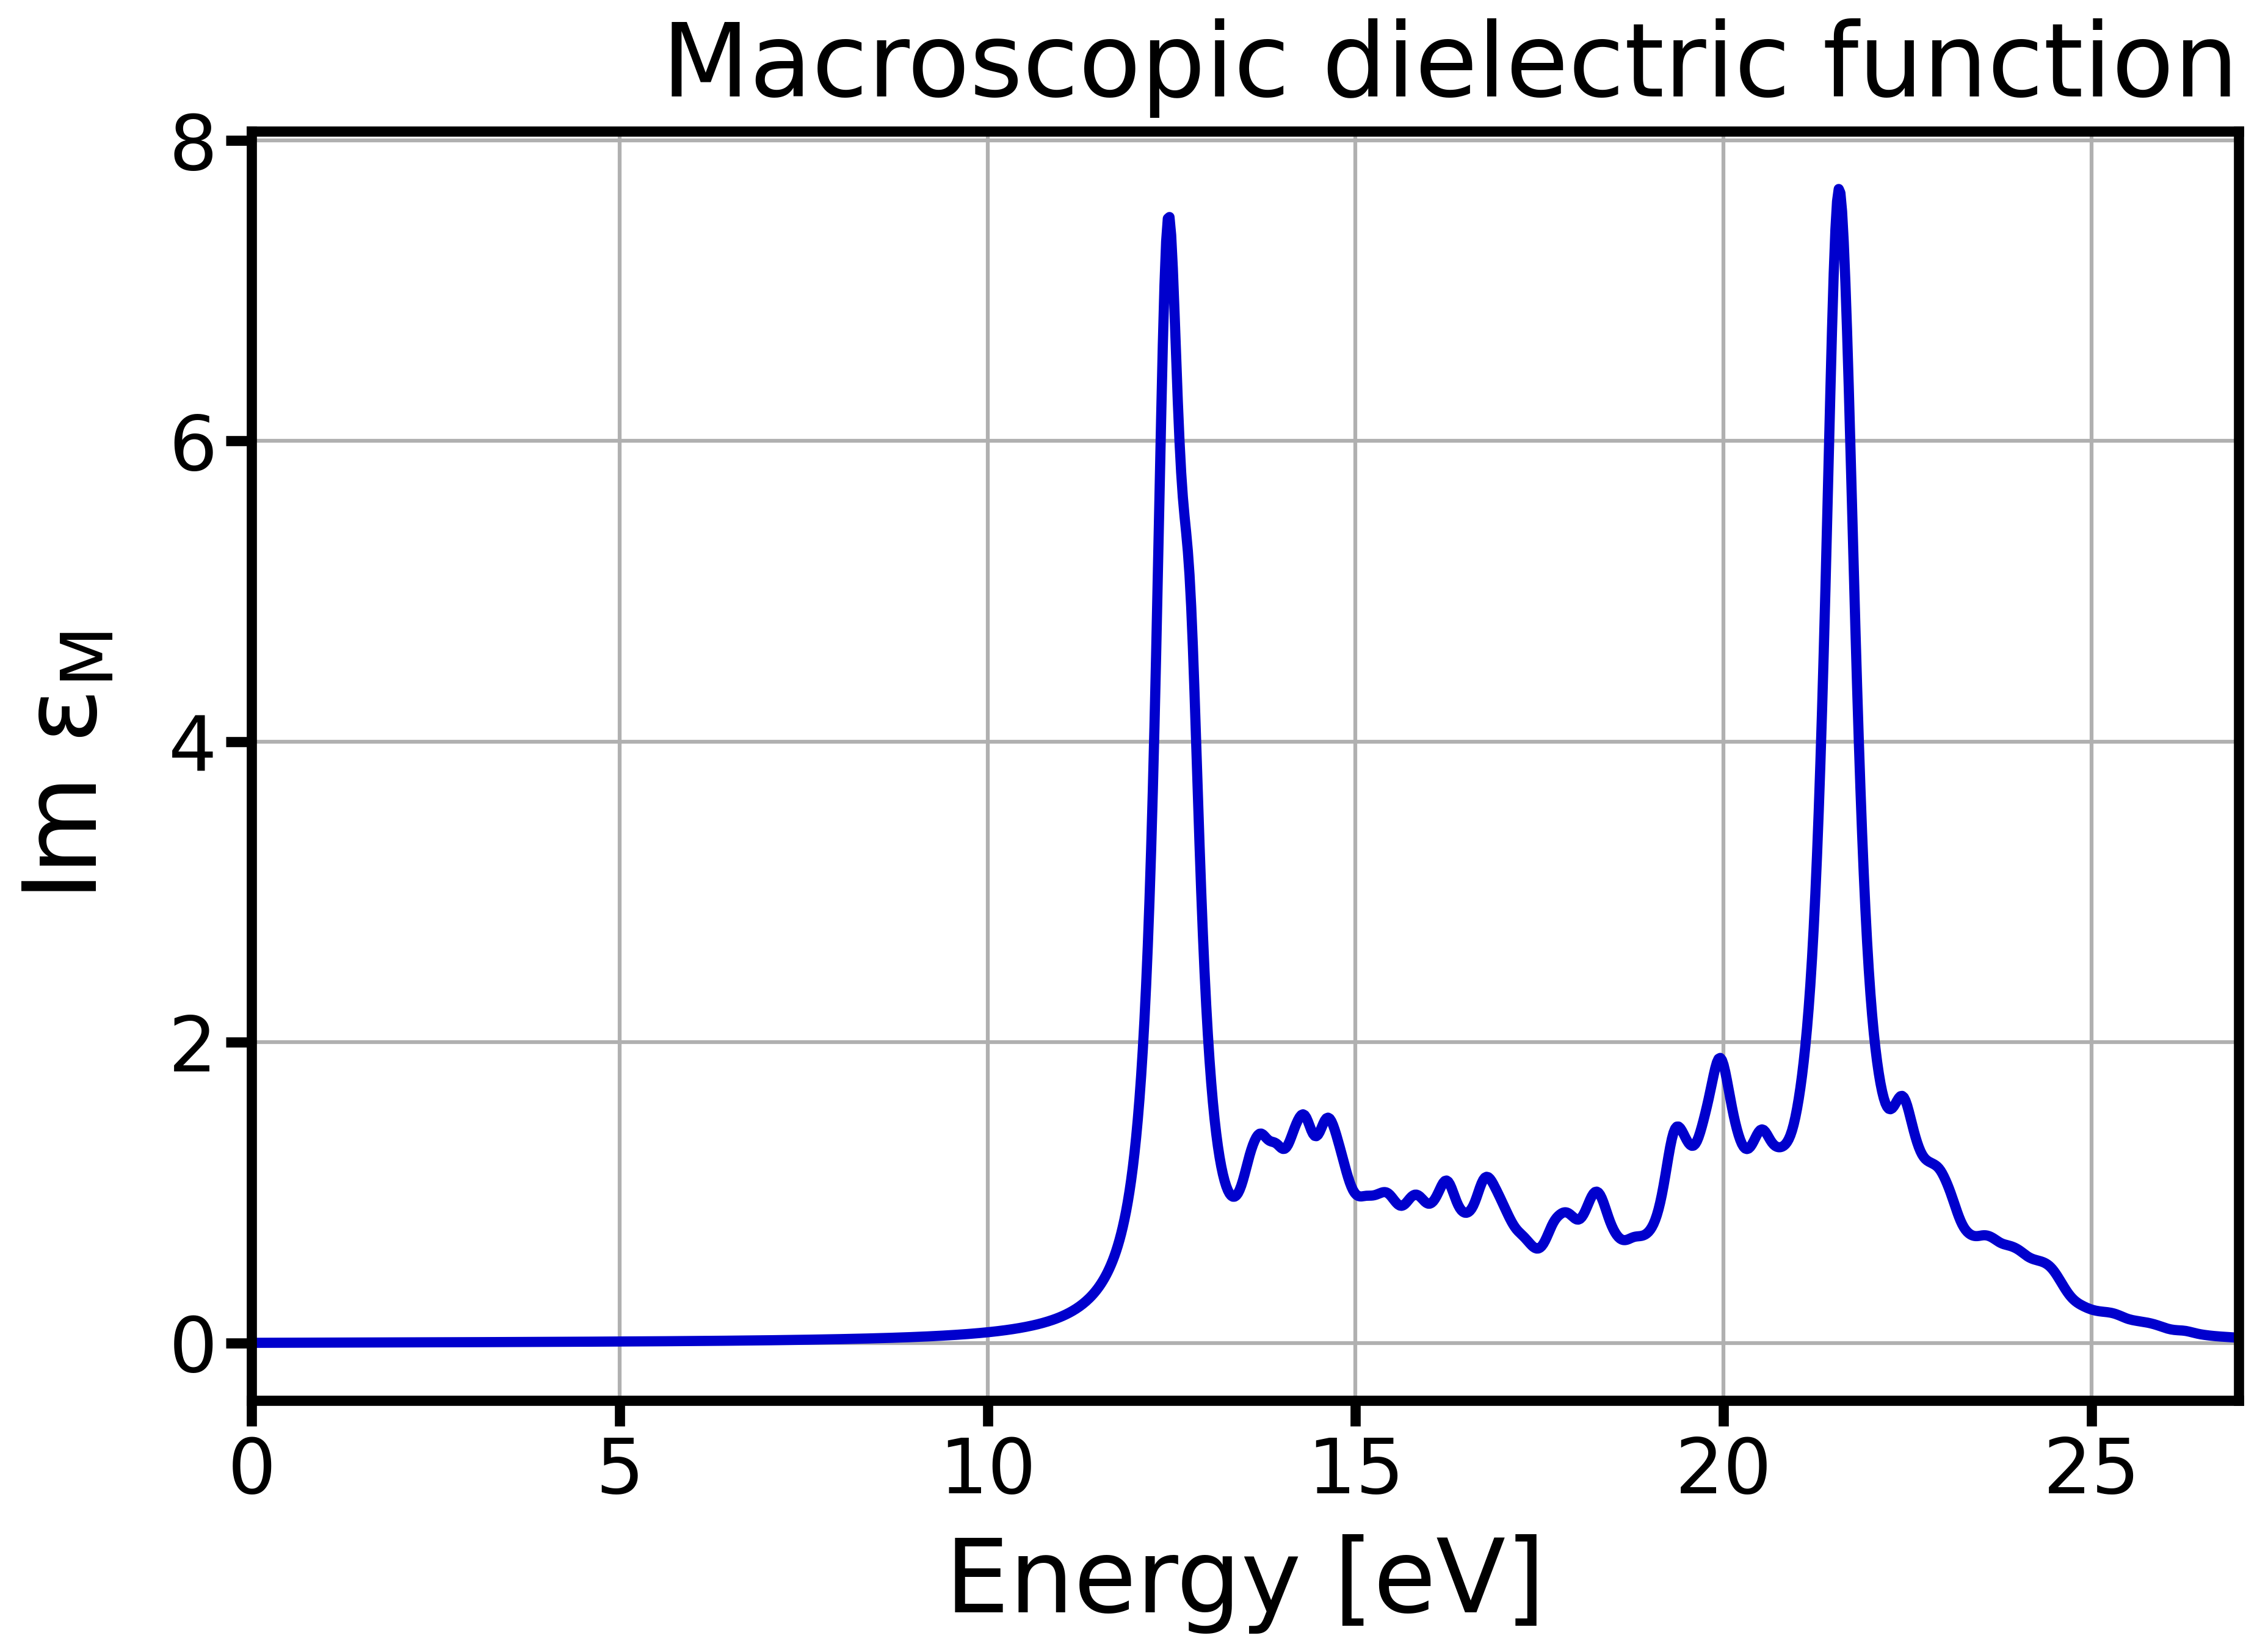" width="600" align="left"/>
</figure>

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. Visualization of the exciton wavefunction</span>

To analyze the excitonic states we inspect the output files contained in the folder **EXCITON**. This directory contains the solutions of the diagonalization of the **BSE**. Specifically, the files **EXCITON_BSE-singlet-TDA-BAR_SCR-full_OCXX.OUT**, where **XX=11,22,33** include the relevant information about the excitation energies and intensities. Each file has six columns. After the progressive index referring to the excitation number, we find the excitation energies, exciton binding energies, oscillator strengths, and finally the real and the imaginary part of the transition coefficients from which the oscillator strengths are computed. An important quantity is the **exciton binding energy**, which is defined as the difference between the lowest excitation energy and the band gap. This quantity is printed in the file header and labeled as **E_shift**. Negative values of the exciton binding energies are associated with bound excitons.

#### <span style="color:#15317E">i) Preparation of the input file</span>

As a post-processing step, we can now visualize the exciton wavefunction, both in real and in reciprocal space. For this purpose we stay in directory **run_LiF_exciton**.

Now, append the following to the file input.xml inside the <code><span style="color:green">xs</span></code> block:
```xml
...
      
   <plan>
         <doonly task="writebevec"/>
         <doonly task="writekpathweights"/>
         <doonly task="excitonWavefunction"/>
      </plan>
 
      <writeexcitons 
         selectenergy="false"
         MinNumberExcitons="1" 
         MaxNumberExcitons="5"
         />
 
      <writekpathweights 
         selectenergy="false"
         MinNumberExcitons="1" 
         MaxNumberExcitons="5"
         />
 
      <excitonPlot epstol="1d-2">
         <exciton lambda="1" fix="hole"/>
         <hole>
            <plot1d>
               <path steps="1">
                  <point coord=" 0.52  0.52  0.52"/>
               </path>
            </plot1d>
         </hole>
         <electron>
            <plot3d>
               <box grid="40 40 40">
                  <origin coord=" -1.0  -1.0  -1.0"/>
                  <point  coord="  2.0  -1.0  -1.0"/>
                  <point  coord=" -1.0   2.0  -1.0"/>
                  <point  coord=" -1.0  -1.0   2.0"/>
               </box>
            </plot3d>
         </electron>
      </excitonPlot>
...

```

To speed up the calculation, it is recommended to skip the ground-state run by inserting the attribute <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> inside the <code><span style="color:green">groundstate</span></code> element.

The attribute <code><span style="color:mediumblue">task</span>=<span style="color:firebrick">"writeexcitons"</span></code>allows printing of the output files containing the **BSE** eigenvectors whereas the attribute <code><span style="color:mediumblue">task</span>=<span style="color:firebrick">"writekpathweights"</span></code> projects the excitonic weights on the band structure path given in the file **bandstructure.dat** that was generated in the first step. These tasks require the presence of corresponding elements <code><span style="color:green">writeexcitons</span></code> and <code><span style="color:green">writekpathweights</span></code> containing the same attributes as the element <code><span style="color:green">storeexcitons</span></code>. The chosen exciton index or energy range must lie within the range given in <code><span style="color:green">storeexcitons</span></code>.

The attribute <code><span style="color:mediumblue">task</span>=<span style="color:firebrick">"excitonWavefunction"</span></code> triggers calculations to generate the real-space representation of the exciton wavefunction without repeating the diagonalization of the **BSE** Hamiltonian. Since the exciton wavefunction is intrinsically a six-dimensional object, it is convenient to perform the visualization for a fixed position of the hole or of the electron.

More than one exciton can be plotted in the same run, by including the element <code><span style="color:green">exciton</span></code> for each desired solution of the BSE. Each excitation is characterized by an index <code><span style="color:mediumblue">lambda</span></code> (reported in the first column of any file EXCITON_BSE-singlet-TDA-BAR_SCR-full_OC*.OUT file in the folder EXCITON) and a flag fix to determine whether the position of the hole or of the electron is fixed in the visualization. Inside the elements <code><span style="color:green">hole</span></code> and <code><span style="color:green">electron</span></code> the real-space visualization volumes are determined, following the conventions explained in How to Visualize Kohn-Sham States.

In our example, the position of the <code><span style="color:green">hole</span></code> is fixed at one point. For this purpose, inside the hole element, the subelement <code><span style="color:green">plot1d</span></code> is included, with <code><span style="color:mediumblue">steps</span>=<span style="color:firebrick">"1"</span></code> inside <code><span style="color:green">path</span></code>. The coordinates of the hole position are given in <code><span style="color:mediumblue">coord</span></code> inside <code><span style="color:green">point</span></code>. The chosen values <code><span style="color:mediumblue">coord</span>=<span style="color:firebrick">" 0.52  0.52  0.52"</span></code> are slightly shifted from the position of the fluorine atom. When setting the hole (or electron) coordinate, **<span style="color:firebrick">we recommend to avoid the exact atomic position</span>** where the electronic wavefunctions typically have nodes, in order to prevent spurious effects in the resulting plot.

Finally, to produce a **3D** plot of the <code><span style="color:green">electron</span></code> part of the excitonic wavefunction, in the electron element we include the subelement <code><span style="color:green">plot3d</span></code> with the related attributes following the procedure illustrated in the tutorial **How to Visualize Kohn-Sham States**.

Another important aspect to consider when plotting exciton wavefunctions is their effective size. The electron-hole wavefunction determines the probability density of finding, e.g., an electron at a given point for a fixed position of the hole, and, contrary to a Kohn-Sham state, is a **<span style="color:firebrick">non-periodic</span>** object. For this reason, it is often necessary to adopt supercells for a meaningful visualization in real space. In this example, we consider for the electron a **3×3×3** supercell surrounding a crystal unit cell. For the origin being at <code><span style="color:mediumblue">coord</span>=<span style="color:firebrick">" -1.0  -1.0  -1.0"</span></code>, the supercell is defined by the point elements with <code><span style="color:mediumblue">coord</span>=<span style="color:firebrick">" 2.0  -1.0  -1.0"</span></code>, <code><span style="color:mediumblue">coord</span>=<span style="color:firebrick">" -1.0  2.0  -1.0"</span></code>, and <code><span style="color:mediumblue">coord</span>=<span style="color:firebrick">" -1.0  -1.0  2.0""</span></code>. The resolution of the calculated isosurface is controlled by the <code><span style="color:mediumblue">grid</span></code> attribute, which should be chosen wisely to reduce the computation time.

Last but not least, the attribute <code><span style="color:mediumblue">epstol</span></code> plays an important practical role for reducing the computational efforts. This parameter allows the user to set a tolerance for the **BSE** eigenvectors $A_{vck}^{\lambda}$, thereby selecting the most relevant transitions responsible for the electron-hole pair formation.

In [10]:
# The following lines modify the input.xml using Python
from excitingtools import ExcitingInputXML, ExcitingXSInput

parsed_input = ExcitingInputXML.from_xml('./run_LiF_exciton/input.xml')

xs = {'xstype': 'BSE', 'ngridk': [3, 3, 3], 'vkloff': [0.097, 0.273, 0.493], 'ngridq': [3, 3, 3], 'nempty': 30,
      'gqmax': 2.5, 'broad': 0.007, 'scissor': 0.20947, 'tappinfo': True, 'tevout': True,
      'energywindow': {'intv': [0.0, 1.0], 'points': 1200},
      'screening': {'screentype': 'full', 'nempty': 60},
      'BSE': {'bsetype': 'singlet', 'nstlbse': [1, 5, 1, 4]},
      'qpointset': [[0.0, 0.0, 0.0]],
      'storeexcitons': {'selectenergy': False, 'MinNumberExcitons': 1, 'MaxNumberExcitons': 5,
                        'MinEnergyExcitons': 0, 'MaxEnergyExcitons': 13.8},
      'plan': ['writebevec', 'writekpathweights', 'excitonWavefunction'],
      'writeexcitons': {'selectenergy': False, 'MinNumberExcitons': 1, 'MaxNumberExcitons': 5},
      'writekpathweights': {'selectenergy': False, 'MinNumberExcitons': 1, 'MaxNumberExcitons': 5},
      'excitonPlot': {'epstol': 0.01, 'exciton': [{'lambda': 1, 'fix': 'hole'}],
      'hole': {'plot1d': {'path': {'steps': 1, 'point': [{'coord': [0.52, 0.52, 0.52]}]}}},
      'electron': {'plot3d': {'box': {'grid': [40, 40, 40], 'point': [{'coord': [2.0, -1.0, -1.0]},
      {'coord': [-1.0, 2.0, -1.0]}, {'coord': [-1.0, -1.0, 2.0]}],'origin': {'coord': [-1.0, -1.0, -1.0]}}}}}}

parsed_input.xs = ExcitingXSInput(**xs)
parsed_input.groundstate.do = "skip"

parsed_input.write('./run_LiF_exciton/input.xml')

<a id='5'></a>
#### <span style="color:#15317E">ii) Running calculations</span>

To run the calculation, type once again:

In [11]:
%%bash
cd run_LiF_exciton
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(bandstr):
 band structure plot written to BAND.OUT
 
 Fermi energy is at zero in plot
 
 Vertex location lines written to BANDLINES.OUT
 
Info(read_bandstructure): Bandstructure read for band interval:       1      11
 Exciton index:    1
 hole positions are fixed


   Elapsed time = 0m12s


A number of sub-folders and output files are now produced. In the following, we analyze them one by one. **<span style="color:firebrick">X</span>** indicates the index λ of the **BSE** solution.

- The files **BEVEC_LAMBDA<span style="color:firebrick">X</span>.OUT** inside the folder **BEVEC** include the list of $|A^{\lambda}_{v\,c\,\mathbf{k}}|^2$ for each **k**-point.
- The files **BEVEC_KSUM_LAMBDA<span style="color:firebrick">X</span>.OUT** inside the folder **BEVEC_KSUM** report $\sum_\mathbf{k}|A^{\lambda}_{v\,c\,\mathbf{k}}|^2$.
- The files **EXEVEC_BSE-singlet-TDA-BAR_SCR-full_QMT001_LAMBDA<span style="color:firebrick">X</span>.OUT** inside the folder **EXCITON_EVEC** include a list of $|A^{\lambda}_{v\,c\,\mathbf{k}}|$ for each k-point sorted according to their absolute value. Corresponding $Im(A^{\lambda}_{v\,c\,\mathbf{k}})$ and $Re(A^{\lambda}_{v\,c\,\mathbf{k}})$ are included as well.
- The files **WEIGHTS_BSE-singlet-TDA-BAR_SCR-full_QMT001_LAMBDA<span style="color:firebrick">X</span>.OUT** inside the folder **KPATHEXC** contain the excitonic weights $w^{\lambda}_{v\mathbf{k}}$ and $w^{\lambda}_{c\mathbf{k}}$ for each **k**-point.
- The files **KPATH_BSE-singlet-TDA-BAR_SCR-full_QMT001_LAMBDA<span style="color:firebrick">X</span>.OUT** inside the folder **KPATHEXC** contain the excitonic weights $w^{\lambda}_{v\mathbf{k}}$ and $w^{\lambda}_{c\mathbf{k}}$  projected on the band structure path given in the file **bandstructure.dat**.
- The files **excitonWavefunction-<span style="color:firebrick">X</span>-<span style="color:green">Y</span>.xsf** and **excitonWavefunction-<span style="color:firebrick">X</span>-<span style="color:green">Y</span>.cube** contain the excitonic wavefunction isosurfaces. Their nomenclature is such that **<span style="color:firebrick">X</span>** indicates the sequential order of the <code><span style="color:green">exciton</span></code> elements, and **<span style="color:green">Y</span>** is the index of the fixed coordinate (in this case, the hole). Since in our example we plot only the electron distribution of one exciton at a single fixed position of the hole, **<span style="color:firebrick">X</span>** = **000001** and **<span style="color:green">Y</span>** = **000001**.


<a id='6'></a>
#### <span style="color:#15317E">iii) Real-space visualization and analysis of the exciton wavefunction</span>

We start analyzing the character of the exciton by inspecting the **3D** plot of the electron-hole wavefunction. To do so, we can use any visualization program supporting **xsf** or **cube** formats, such as **VESTA** or **XCrysDen**. For **XCrysDen**, follow the instructions provided in the tutorial **How to Visualize Kohn-Sham States**. To use **VESTA**, invoke the program by typing in your shell (note that you need **VESTA** version 3.3.2 or later to be able to reproduce the plot shown below):

In [12]:
%%bash
cd run_LiF_exciton
vesta
cd ..

**VESTA** will open in a separate window. In the menu bar on top press **<span style="color:#15317E">File -> Open…</span>** to select the file to be shown. Double-click on **excitonWavefunction-000001-000001.xsf** and the structure will appear. Tune the isovalue by using the menu bar on the left side. Select **<span style="color:#15317E">Properties -> Isosurfaces</span>** and a small window will pop up. Click on the line shown in the white isovalue table in the middle of the window. Then, tune the field **<span style="color:#15317E">Isosurface level</span>** by typing **0.0037**, then press **<span style="color:#15317E">OK</span>**. Visualize the 3×3×3 supercell by selecting **<span style="color:#15317E">Boundary</span>** and changing in the window which will appear **<span style="color:#15317E">XCrySDen XSF file</span>** to **<span style="color:#15317E">XCrySDen XSF structure data</span>**. In the same window, set **x(min)**, **y(min)**, **z(min)** to **-1** and **x(max)**, **y(max)**, **z(max)** to **2**, then press again **<span style="color:#15317E">OK</span>**. Select the view along the **<span style="color:#15317E">a</span>** axis by clicking on **a** in the top left corner. Finally unclick **<span style="color:#15317E">Show session</span>**. The resulting plot will resemble the one shown below:

<figure>
<img src=" 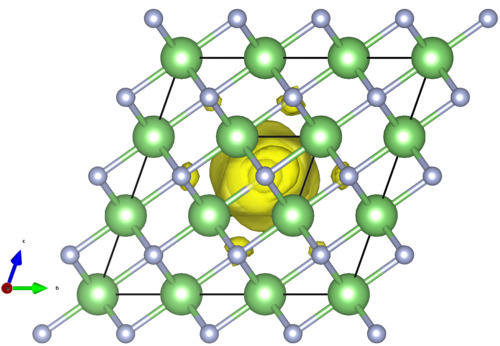" width="500" align="left"/>
</figure>

<a id='7'></a>
#### <span style="color:#15317E">iv) Reciprocal-space visualization and analysis of the exciton wavefunction</span>

We finally analyze the character of the electron-hole pair in reciprocal space. To do so, we need to visualize the files **KPATH_BSE-singlet-TDA-BAR_SCR-full_QMT001_LAMBDA<span style="color:firebrick">X</span>.OUT** containing the information on the valence and conduction bands that mostly contribute to a given exciton in LiF. To visualize the character of the first exciton, execute the following commands:

In [13]:
%%bash
cd run_LiF_exciton
cp KPATHEXC/KPATH_BSE-singlet-TDA-BAR_SCR-full_QMT001_LAMBDA000001.OUT LiF-exciton-1
python3 -m excitingscripts.plot.exciton_weights LiF LiF-exciton-1 -10 15 0.5
cd ..

In the last command line above, the first two numbers after the file name define the energy range in eV, the third defines the size of the excitonic weights which are represented by red circles. The plot is saved in **LiF-exciton-1.png**, which is shown below.

<figure>
<img src=" 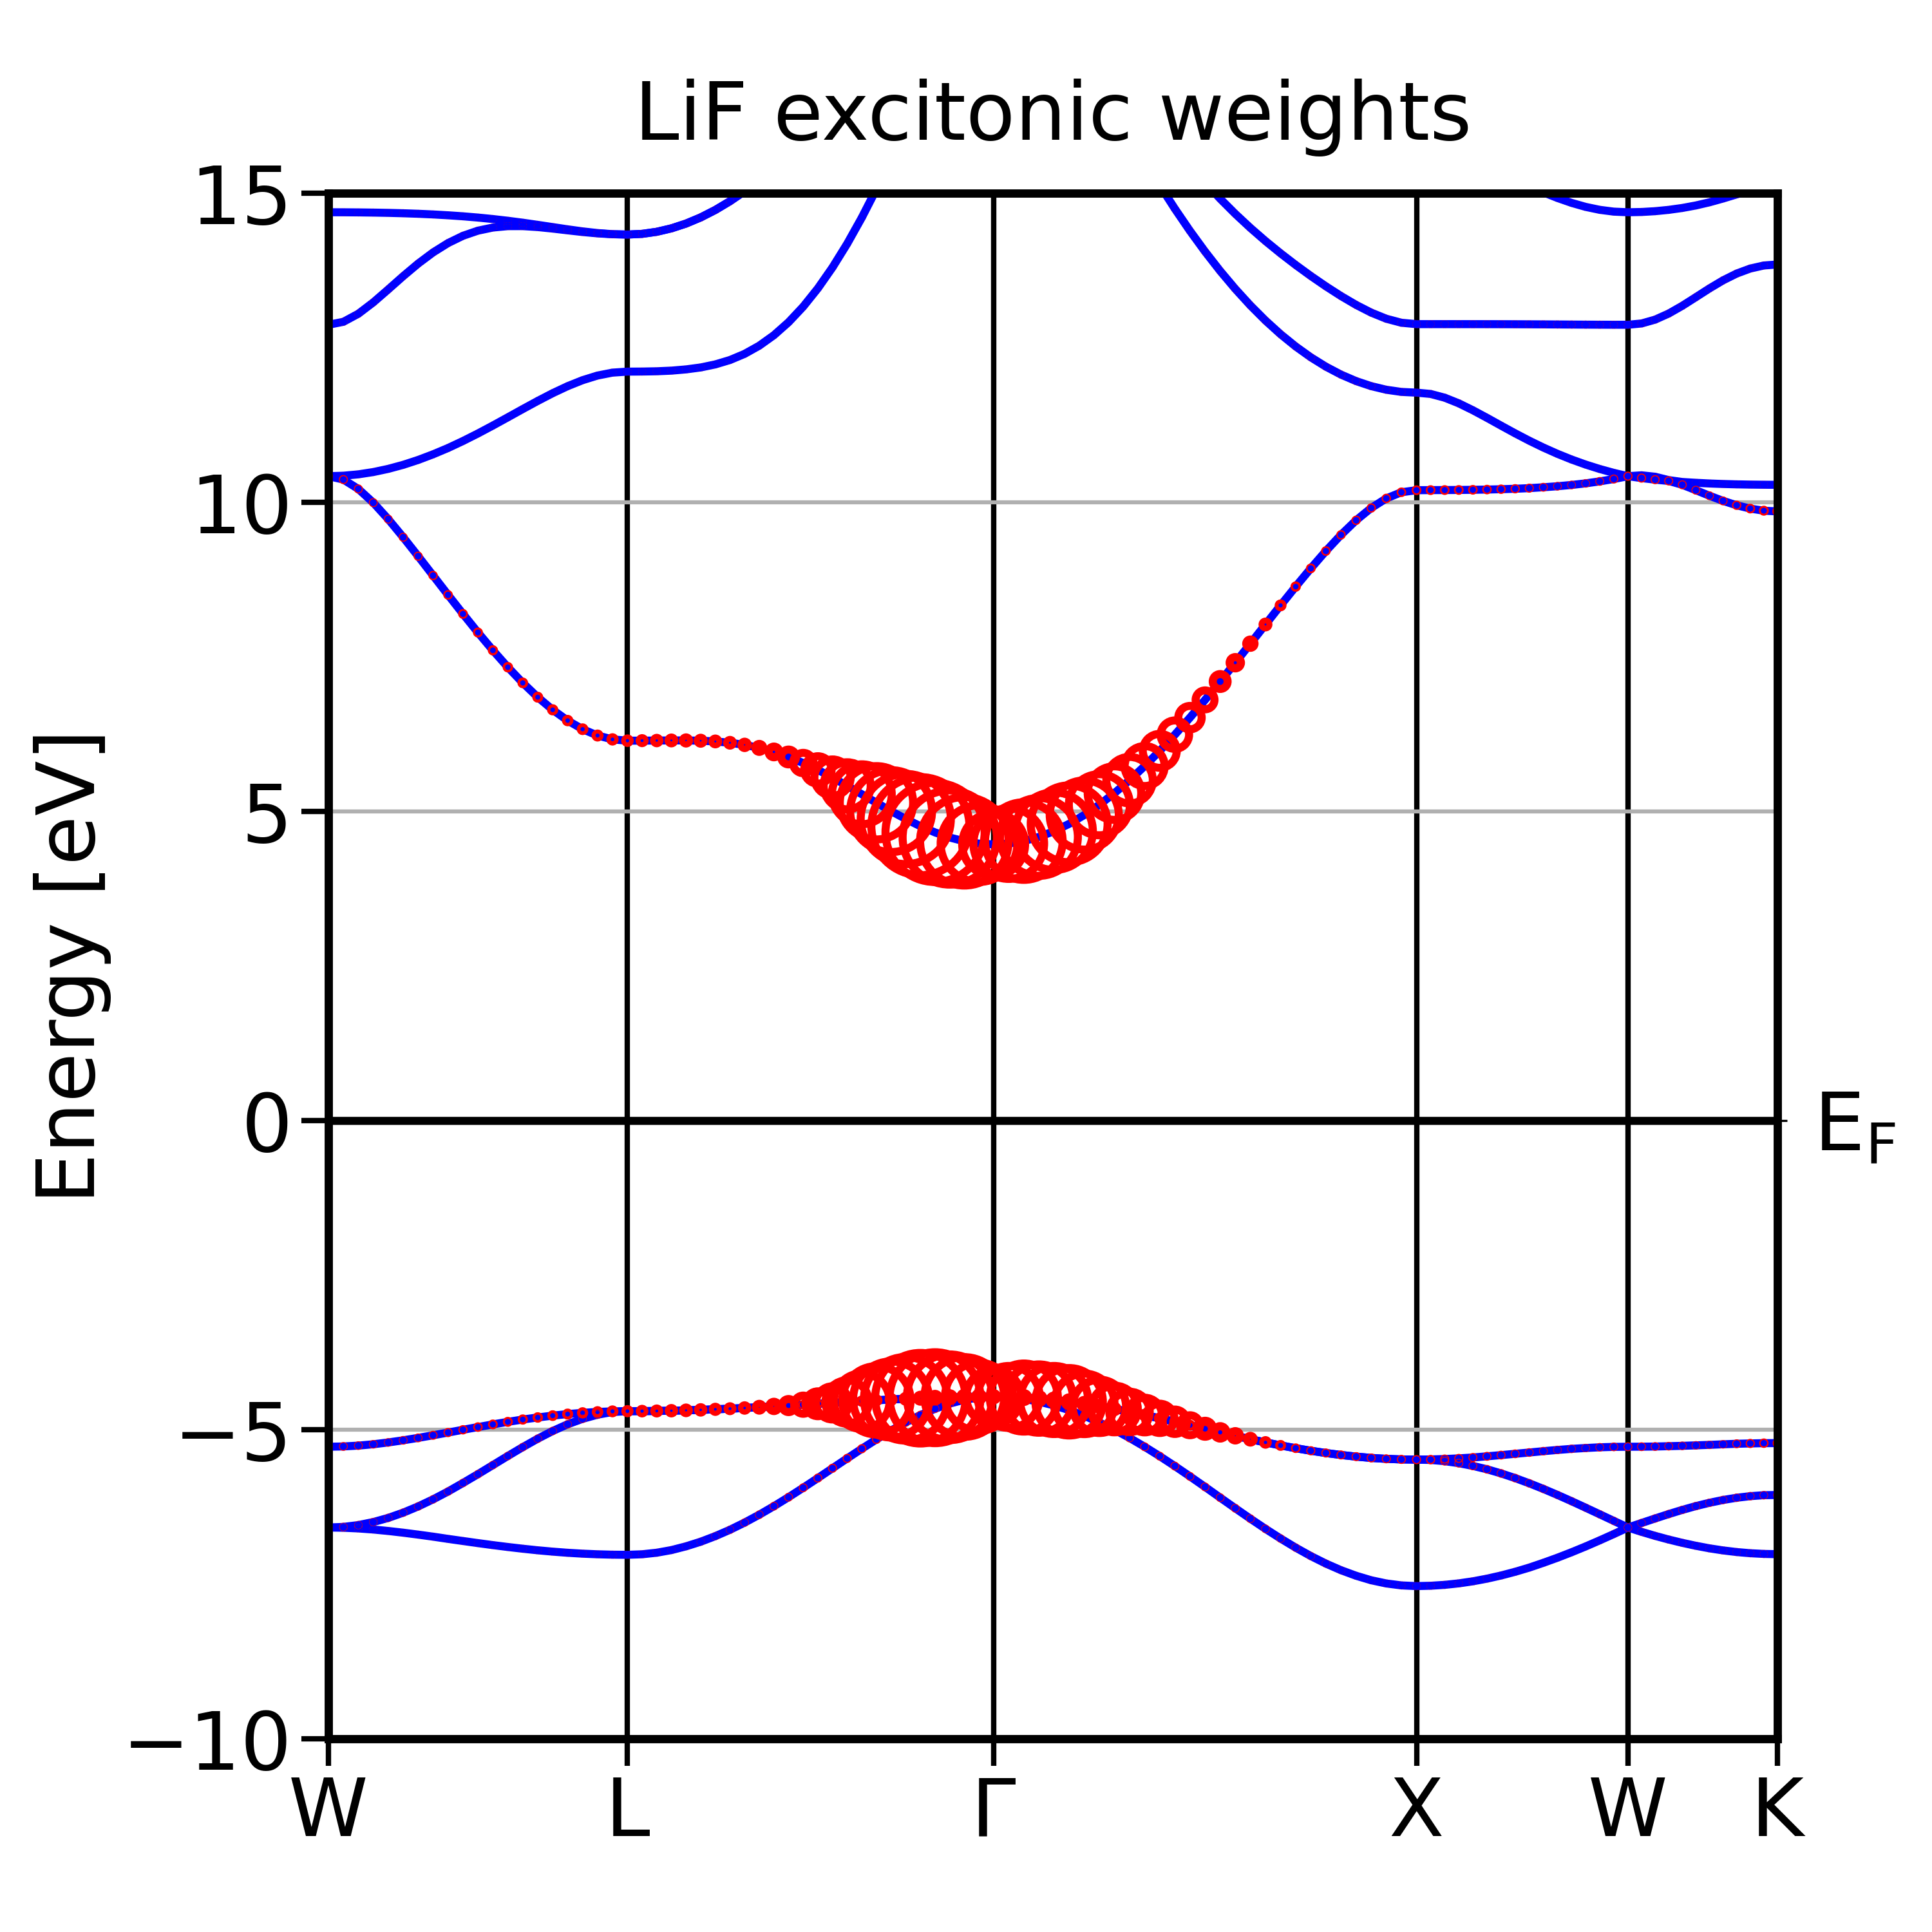" width="500" align="left"/>
</figure>

In this plot you see the excitonic weights concentrated at the valence-band top and at the conduction-band bottom.

<a id='8'></a>
#### <span style="color:green">Exercises</span>
- Give an interpretation of the shape of the calculated electron-hole wavefunction.
- Modify the input to visualize the exciton wavefunction corresponding to a hole located on a line connecting two neighboring Li and F atoms. Try to understand the sensitivity of the wavefunction to the choice of the origin.

#### <span style="color:#15317E">v) Visualization of core excitations</span>

The procedure shown above can be applied also to the visualization and analysis of excitons in core-level absorption spectra. The elements <code><span style="color:green">storeexcitons</span></code>, <code><span style="color:green">writeexcitons</span></code>, <code><span style="color:green">writekpathweights</span></code> and <code><span style="color:green">excitonPlot</span></code> can be used in this case as well. However, in the **<span style="color:firebrick">reciprocal-space visualization</span>** of the excitation it should be noted that only the weights of the electronic part, namely of the conduction bands, are plotted. In the following we show how to visualize the electronic part of the core-exciton weights using the example of the spectrum from the B **K**-edge of cubic BN. For more information on core-level spectra, see the tutorial **X-ray absorption spectra using BSE**.

As a first step, **<span style="color:firebrick">repeat</span>** the BSE and the band structure calculation for cubic BN in a different folder:

In [2]:
%%bash 
mkdir -p run_BN_exciton

You may use the following input file as input.xml for the initialization run.

<span class="BN_BSE_VISUAL"></span>
```xml
<input>
 
   <title>Cubic boron nitride</title>
 
   <structure autormt="true" speciespath="$EXCITINGROOT/species/">
      <crystal scale="6.83136">
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
         <basevect>0.5 0.5 0.0</basevect>
      </crystal>
      <species speciesfile="B.xml" >
         <atom coord="0.00 0.00 0.00" />
      </species>
      <species speciesfile="N.xml">
         <atom coord="0.25 0.25 0.25" />
      </species>
   </structure>
 
   <groundstate 
      ngridk="4 4 4"
      xctype="GGA_PBE_SOL"
      gmaxvr="14.0" />
 
   <properties>
      <bandstructure>
         <plot1d>
            <path steps="100">
               <point coord="0.500   0.000   0.500" label="X"    />
               <point coord="0.500   0.250   0.750" label="W"    />
               <point coord="0.500   0.500   0.500" label="L"    />
               <point coord="0.000   0.000   0.000" label="GAMMA"/>
               <point coord="0.500   0.000   0.500" label="X"    />
            </path>
         </plot1d>
      </bandstructure>
   </properties>
 
   <xs
      xstype="BSE" 
      ngridk="2 2 2" 
      vkloff="0.05 0.15 0.25"
      ngridq="2 2 2"
      nempty="30" 
      gqmax="3.0" 
      broad="0.018"
      tevout="true" >
 
      <energywindow 
         intv="13.4 16.5" 
         points="1500" />
 
      <screening 
         screentype="full" 
         nempty="100" />
 
      <BSE 
         xas="true"
         xasspecies="2"
         xasatom="1"
         xasedge="K"
         bsetype="singlet" 
         nstlxas="1 15" />
 
      <qpointset>
         <qpoint>0.0 0.0 0.0</qpoint>
      </qpointset>
 
   </xs>
 
</input>

```

In [7]:
# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("02_tutorial_exciton_analysis_and_visualization", "BN_BSE_VISUAL")

# Write out the input as an XML file:
with open('./run_BN_exciton/input.xml', "w") as fid:
    fid.write(input_str)

After updating the <code><span style="color:mediumblue">speciespath</span></code> with

In [8]:
%%bash
cd run_BN_exciton
python3 -m excitingscripts.setup.excitingroot
cd ..

run **`exciting`** with the usual command:

In [ ]:
%%bash
cd run_BN_exciton
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

For visualization purposes we focus on the **second exciton of the spectrum** which is the most intense one in the lowest-energy region of the spectrum. Following the procedure illustrated in the previous sections, we should add the following lines to the <code><span style="color:green">xs</span></code> element in order to store and print the weight of the first 5 excitations as well as the corresponding conduction band weights:

```xml
...
      <plan>
         <doonly task="bse"/>
         <doonly task="writebevec"/>
         <doonly task="writekpathweights"/>
      </plan>
 
      <storeexcitons 
         selectenergy="false"
         MinNumberExcitons="1" 
         MaxNumberExcitons="5"
         />
 
      <writeexcitons 
         selectenergy="false"
         MinNumberExcitons="1" 
         MaxNumberExcitons="5"
         />
 
      <writekpathweights 
         selectenergy="false"
         MinNumberExcitons="1" 
         MaxNumberExcitons="5"
         />
...
```

In [17]:
parsed_input = ExcitingInputXML.from_xml('./run_BN_exciton/input.xml')

xs = {'xstype': 'BSE', 'ngridk': [2, 2, 2], 'vkloff': [0.05, 0.15, 0.25], 'ngridq': [2, 2, 2], 'nempty': 30,
      'gqmax': 3.0, 'broad': 0.018, 'tevout': True, 'energywindow': {'intv': [13.4, 16.5], 'points': 1500},
      'screening': {'screentype': 'full', 'nempty': 100},
      'BSE': {'xas': True, 'xasspecies': 2, 'xasatom': 1, 'xasedge': 'K', 'bsetype': 'singlet', 'nstlxas': [1, 15]},
      'qpointset': [[0.0, 0.0, 0.0]],
      'plan': ['bse', 'writebevec', 'writekpathweights'],
      'storeexcitons': {'selectenergy': False, 'MinNumberExcitons': 1, 'MaxNumberExcitons': 5},
      'writeexcitons': {'selectenergy': False, 'MinNumberExcitons': 1, 'MaxNumberExcitons': 5},
      'writekpathweights': {'selectenergy': False, 'MinNumberExcitons': 1, 'MaxNumberExcitons': 5}}

parsed_input.xs = ExcitingXSInput(**xs)
parsed_input.groundstate.do = "skip"

parsed_input.write('./run_BN_exciton/input.xml')

Now, run **`exciting`** again to generate files for the visualization with the usual command:

In [21]:
%%bash
cd run_BN_exciton
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(bandstr):
 band structure plot written to BAND.OUT
 
 Fermi energy is at zero in plot
 
 Vertex location lines written to BANDLINES.OUT
 
           0
 
Info(read_bandstructure): Bandstructure read for band interval:       1      10


   Elapsed time = 0m2s


We can now visualize the band contributions similar to the example above:

In [22]:
%%bash
cd run_BN_exciton
cp KPATHEXC/KPATH_BSE-singlet-TDA-BAR_SCR-full_QMT001_LAMBDA000002.OUT BN-exciton-2
python3 -m excitingscripts.plot.exciton_weights BN BN-exciton-2 0 27 0.7
cd ..

The resulting image (**BN-exciton-2.png**) will look like this:

<figure>
<img src=" 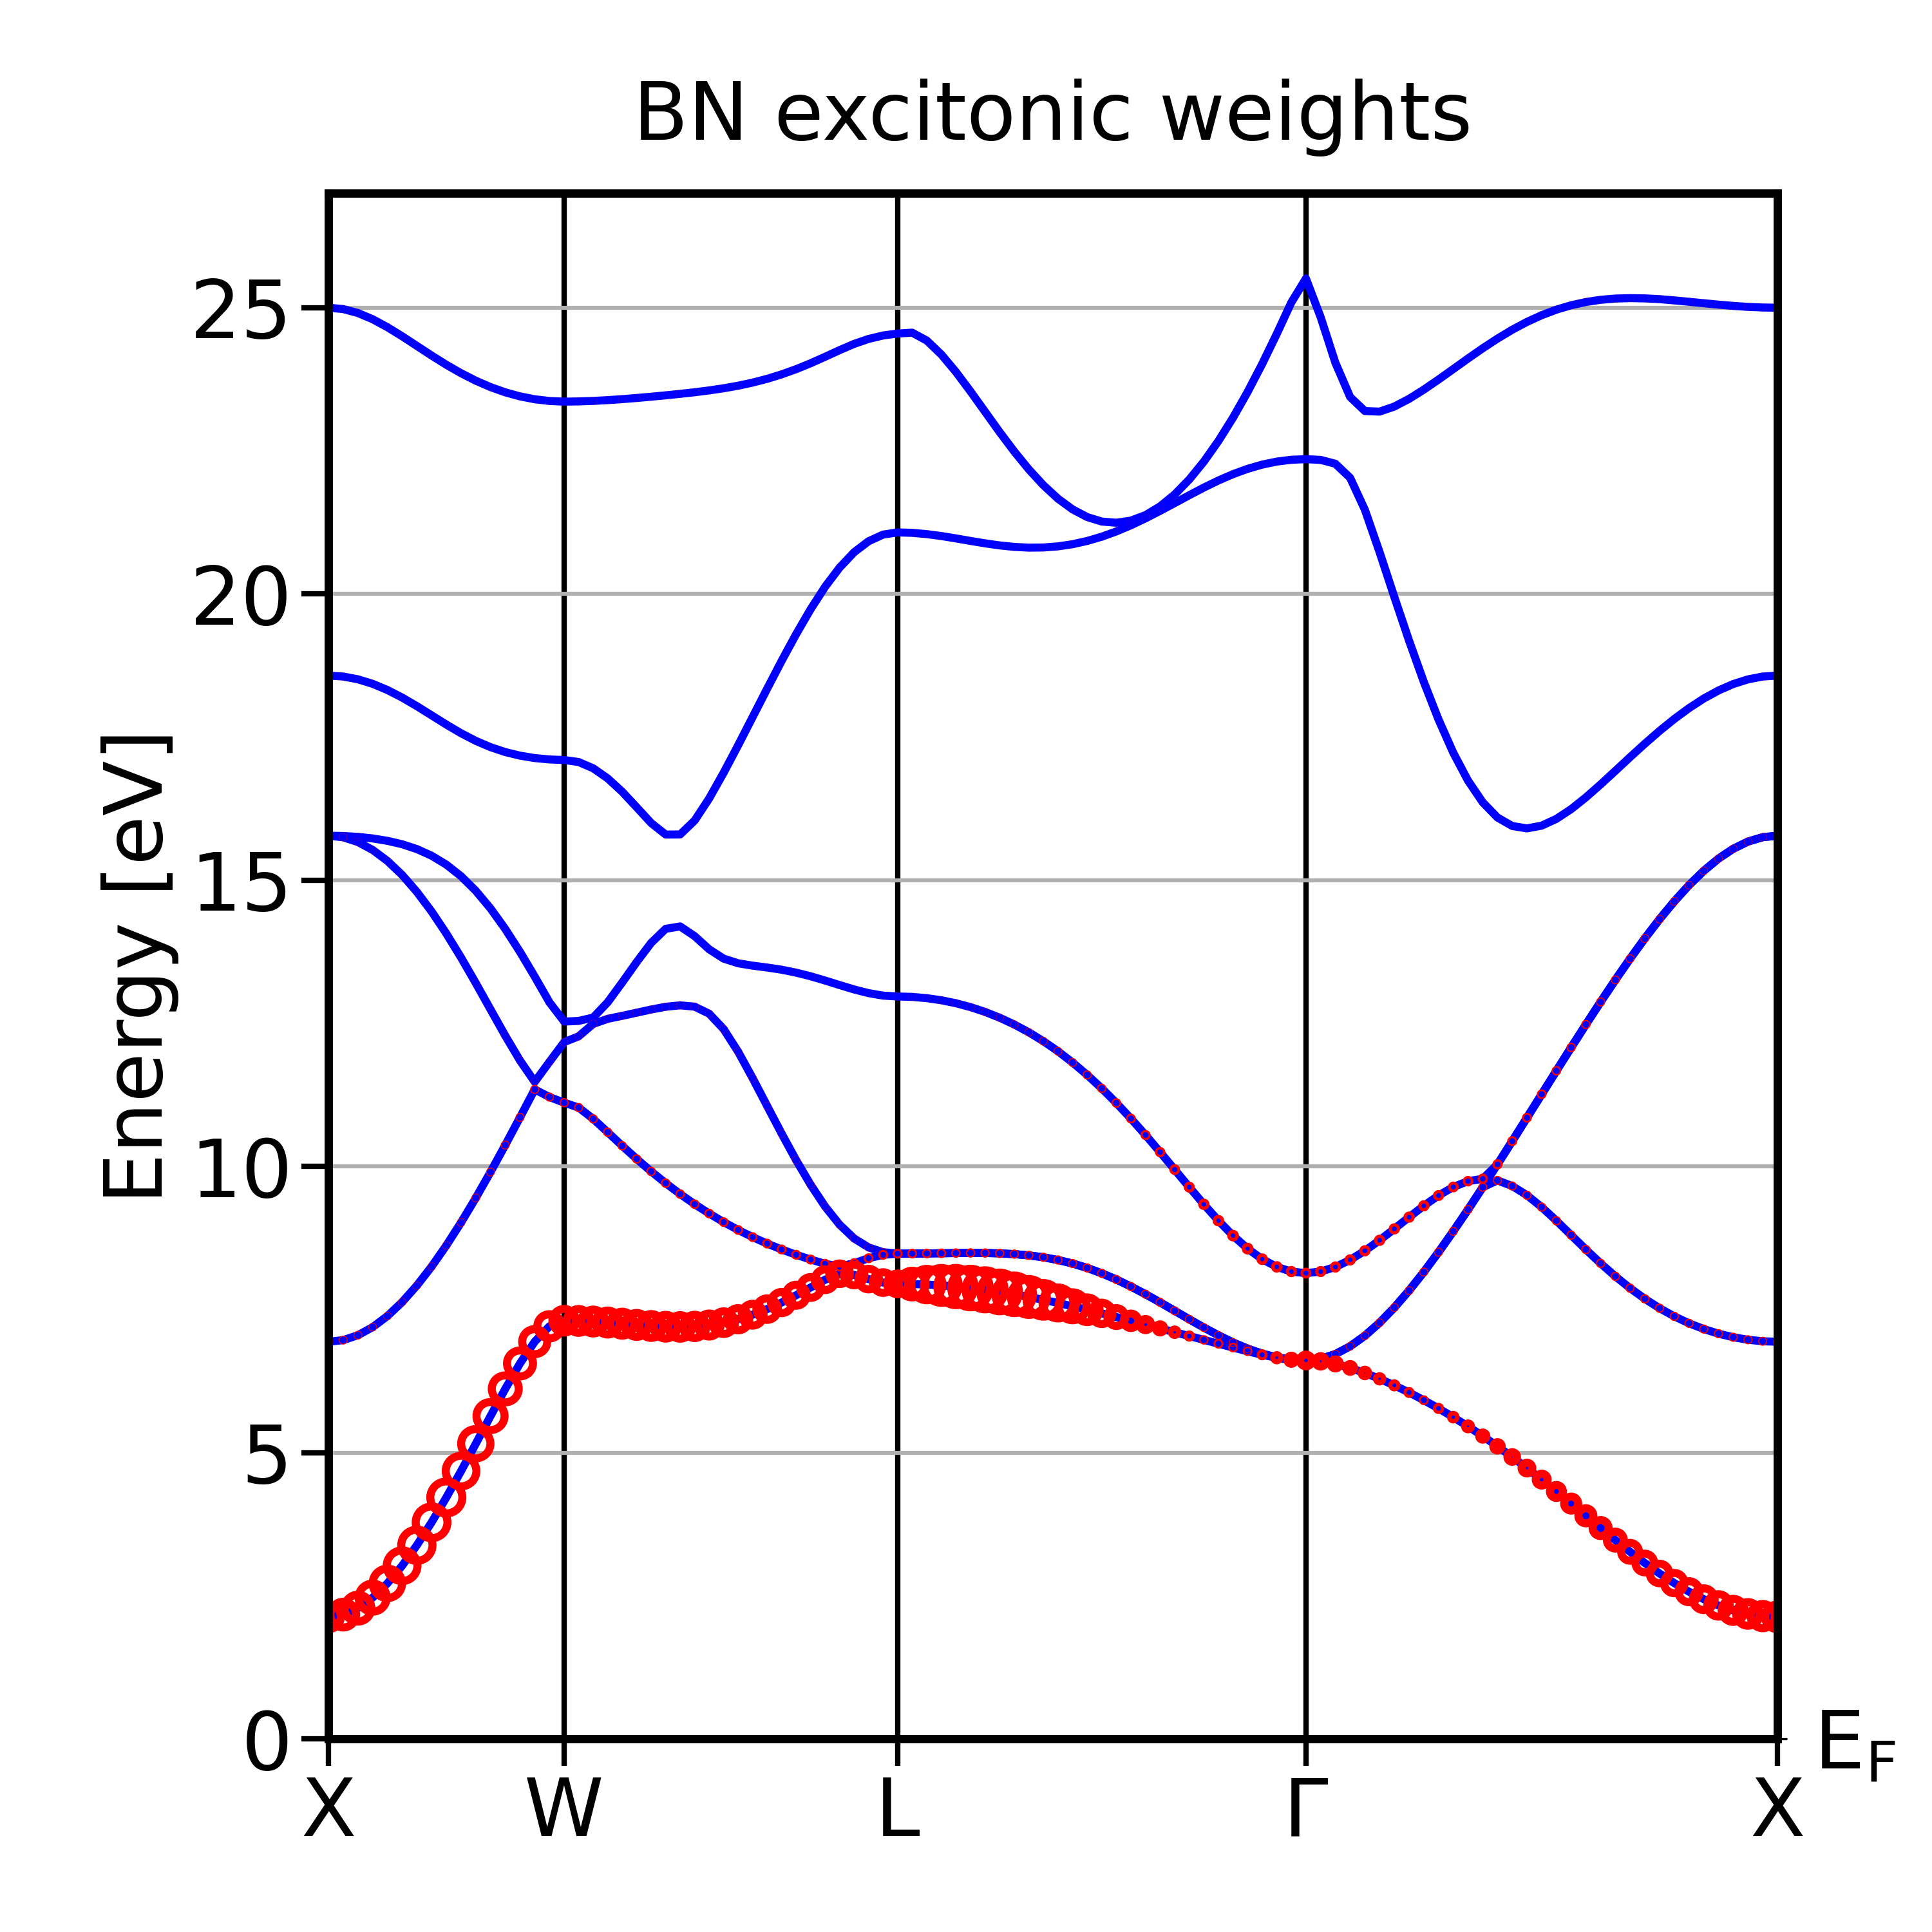" width="500" align="left"/>
</figure>

<a id='9'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">Literature</span>
- The discussion of LiF exciton wave function can be found in, *e.g.*, M. Gatti and F. Sottile, Phys. Rev. B **88**, 155113 (2013)

<hr style="border:2px solid #DDD"> </hr>